In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Baca file CSV mentah
df = pd.read_csv('/content/drive/MyDrive/datasets/Dataset Review Product di Shopee dan Tokopedia.csv', sep=';', encoding='latin1')

# Tampilkan data hasil
df.head(10)


,review_id,review,rating
0,0,slow delivery,1
1,1,Dateng goods do not conform pesanan??,1
2,2,PSN k its 20 other DTG,1
3,3,I am expected that it have a frame and painted...,1
4,4,The product quality is not good.,1
5,5,goods came really not the same as shown in the...,1
6,6,Q order came quickly but im so very disappoint...,1
7,7,Aprox 1 bjunyaa,1
8,8,"Send a brown color to black, very sick.",1
9,9,Did not receive item Will not order again,1


In [23]:
# Beri nama kolom
df.columns = ['review_id', 'review', 'rating']

# Hapus baris yang tidak punya rating
df = df.dropna(subset=['rating'])

# Ubah data rating ke integer
df['rating'] = df['rating'].astype(int)

# Tambahkan kolom sentimen berdasarkan rating
def label_sentiment(rating):
  if rating >= 4:
    return 'Positive'
  elif rating <= 2:
    return 'Negative'
  else:
    return 'Neutral'

df['sentiment'] = df['rating'].apply(label_sentiment)

# Hasil
df[['review', 'rating', 'sentiment']].head(10)

ValueError: Length mismatch: Expected axis has 5 elements, new values have 3 elements

In [32]:
# Fungsi Normalisasi teks
def clean_review(text):
  text = str(text).lower()                    # pakai lowercase
  text = re.sub(r'[^\w\s]', '', text)         # hapus tanda baca
  text = re.sub(r'\d+', '', text)             # hapus angka
  text = re.sub(r's\+', ' ', text).strip()    # hapus spasi berlebih
  return text

#Terapkan ke kolom review
df['clean_review'] = df['review'].apply(clean_review)

# Lihat Hasil
df[['review', 'clean_review']].head(10)

,review,clean_review
0,slow delivery,slow delivery
1,Dateng goods do not conform pesanan??,dateng goods do not conform pesanan
2,PSN k its 20 other DTG,psn k its other dtg
3,I am expected that it have a frame and painted...,i am expected that it have a frame and painted...
4,The product quality is not good.,the product quality is not good
5,goods came really not the same as shown in the...,goods came really not the same as shown in the...
6,Q order came quickly but im so very disappoint...,q order came quickly but im so very disappoint...
7,Aprox 1 bjunyaa,aprox bjunyaa
8,"Send a brown color to black, very sick.",send a brown color to black very sick
9,Did not receive item Will not order again,did not receive item will not order again


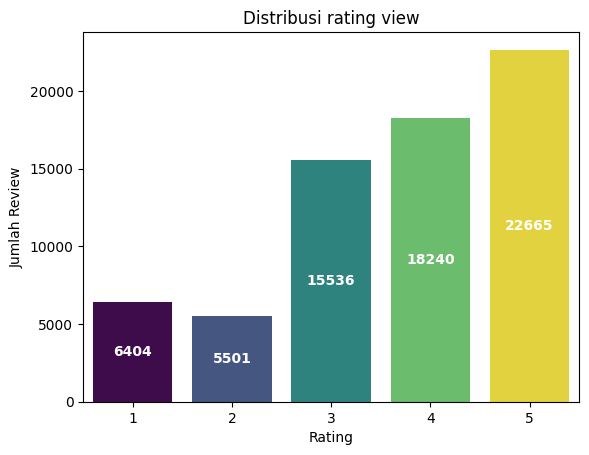

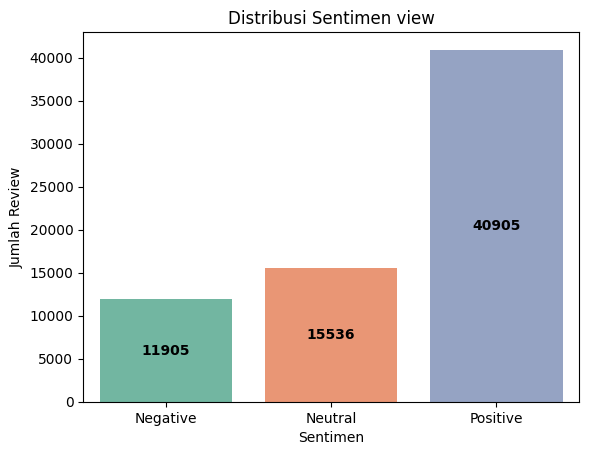

In [38]:
# Distribusi rating
ax = sns.countplot(data=df, x='rating', hue='rating', palette='viridis', legend=False)
plt.title('Distribusi rating view')
# Menampilkan angka setiap batang
for p in ax.patches:
  height = p.get_height()
  ax.text(
      p.get_x() + p.get_width() / 2.,     # posisi horizontal (tengah)
      height / 2,                         # posisi vertikal (tengah)
      f'{int(height)}',                   # isi angka
      ha='center', va='center',           # align
      fontsize=10, color='white', fontweight='bold'
  )
plt.xlabel('Rating')
plt.ylabel('Jumlah Review')
plt.show()


# Distribusi sentimen
ax = sns.countplot(data=df, x='sentiment', hue='sentiment', palette='Set2', legend=False)
plt.title('Distribusi Sentimen view')
# Menampilkan angka setiap batang
for p in ax.patches:
  height = p.get_height()
  ax.text(
      p.get_x() + p.get_width() / 2.,
      height / 2,
      f'{int(height)}',
      ha="center", va="center",
      fontsize=10, color='black', fontweight='bold'
  )
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Review')
plt.show()

In [45]:
!pip install textblob
from textblob import TextBlob

# Klasifikasi sentimen otomatis (3 label)
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['textblob_sentiment'] = df['clean_review'].apply(get_sentiment)

# Lihat hasil awal
df[['clean_review', 'textblob_sentiment']].head(10)

,clean_review,textblob_sentiment
0,slow delivery,Negative
1,dateng goods do not conform pesanan,Neutral
2,psn k its other dtg,Negative
3,i am expected that it have a frame and painted...,Negative
4,the product quality is not good,Negative
5,goods came really not the same as shown in the...,Neutral
6,q order came quickly but im so very disappoint...,Negative
7,aprox bjunyaa,Neutral
8,send a brown color to black very sick,Negative
9,did not receive item will not order again,Neutral
